# Introduction

1. How does the choice of school play into academic performance?
2. Are there differences in achievement based on gender, location, or student attitudes?
3. Are there differences in achievement based on teacher practices and attitudes?
4. Does there exist inequality in academic achievement?

# Import libs

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [3]:
df = pd.read_csv('pisa2012.csv', encoding='latin-1')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


# Question 1: Academic performance vs. choice of school

In [31]:
regions = df.CNT.unique()
regions

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

Relevant columns:

- CNT: Country
- IC02Q01: At school - Desktop Computer
- IC02Q02: At school - Portable laptop
- IC02Q03: At school - Tablet computer
- PV1MATH ~ PV5SCIE: Scores in mathematics



In [134]:
df_school = df[['CNT','IC02Q01', 'IC02Q02', 'IC02Q03','PV1MATH', 'PV2MATH']]

In [135]:
df_school['IC02Q02'].sample(10)

133139                   No
398549                  NaN
132642                   No
117814                  NaN
171899                   No
59625                   NaN
392675                  NaN
32344     Yes, and I use it
4907                    NaN
39158                    No
Name: IC02Q02, dtype: object

Convert the datatype of Column IC02Q01 to boolean

In [136]:
def convert_bool(v):
    if type(v) is float:
        return np.nan
    elif "Yes" in v:
        return 1
    else: return 0

In [137]:
df_school['desktop'] = df_school.IC02Q01.apply(convert_bool)
df_school['laptop'] = df_school.IC02Q02.apply(convert_bool)
df_school['tablet'] = df_school.IC02Q03.apply(convert_bool)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [138]:
df_school.sample(5)

,CNT,IC02Q01,IC02Q02,IC02Q03,PV1MATH,PV2MATH,desktop,laptop,tablet
226784,Indonesia,NaN,NaN,NaN,242.8805,376.0788,NaN,NaN,NaN
84771,Canada,NaN,NaN,NaN,408.4047,437.2254,NaN,NaN,NaN
130653,Czech Republic,"Yes, but I dont use it",No,No,401.3943,407.6258,1.0,0.0,0.0
234546,Iceland,"Yes, and I use it",No,No,476.9512,467.6040,1.0,0.0,0.0
207628,Hong Kong-China,"Yes, and I use it","Yes, but I dont use it",No,608.5917,619.4968,1.0,1.0,0.0


In [139]:
df_school.drop(columns=['IC02Q01','IC02Q02','IC02Q03'], inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [140]:
# drop rows with NaN
df_school.dropna(inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [141]:
df_school['computers'] = df_school.desktop + df_school.laptop + df_school.tablet

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [161]:
regions = df_school.CNT.unique()
regions

array(['Australia', 'Austria', 'Belgium', 'Switzerland', 'Chile',
       'Costa Rica', 'Czech Republic', 'Germany', 'Denmark', 'Spain',
       'Estonia', 'Finland', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Jordan',
       'Japan', 'Korea', 'Liechtenstein', 'Latvia', 'Macao-China',
       'Mexico', 'Netherlands', 'Norway', 'New Zealand', 'Poland',
       'Portugal', 'China-Shanghai', 'Perm(Russian Federation)',
       'Russian Federation', 'Singapore', 'Serbia', 'Slovak Republic',
       'Slovenia', 'Sweden', 'Chinese Taipei', 'Turkey', 'Uruguay'],
      dtype=object)

In [159]:
for r in regions:
    data[r] = df_school[df_school.CNT == r].groupby('computers').mean()

In [155]:
data['Australia'] = df_school.query('CNT == "Australia"').groupby('computers').mean()

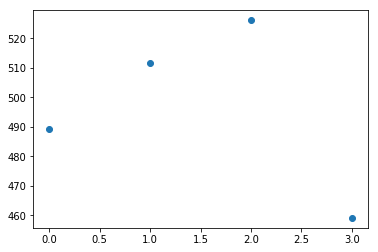

In [165]:
r = 'Austria'
plt.scatter(x= data[r].index, y=data[r].PV1MATH)